**Plan**

**1. Introduction to PyTorch Datasets**

**2. Data preprocessing techniques**

**3. Data augmentation**



# **Introduction to PyTorch Datasets**

PyTorch provides powerful utilities for handling and processing data through its Dataset and DataLoader classes. These tools are essential for efficient data manipulation and feeding data into your models during training and evaluation.


**<h2>1. PyTorch Dataset</h2>**

The Dataset class is an abstract class representing a dataset. Custom datasets can be created by subclassing torch.utils.data.Dataset and implementing the __len__ and __getitem__ methods.
Example: Custom Dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Example data
data = torch.randn(1000, 1, 28, 28)
labels = torch.randint(0, 10, (1000,))

# Creating dataset
dataset = CustomDataset(data, labels)
print("CustomDataset created with length:", len(dataset))

**<h2>2. PyTorch DataLoader</h2>**

The DataLoader class provides an iterable over the given dataset with support for batching, shuffling, and parallel data loading. It's essential for efficiently loading data during model training and evaluation.

**Basic Usage**

In [ ]:
# Creating DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterating through DataLoader
for inputs, labels in dataloader:
    print(inputs.shape, labels.shape)
    break

**<h2>3. collate_fn in DataLoader</h2>**

The collate_fn argument in DataLoader allows you to specify how a list of samples (from __getitem__) should be merged into a batch. This is useful when dealing with variable-length sequences or more complex data structures.

**Example: Custom Collate Function**

In [ ]:
def custom_collate_fn(batch):
    data, labels = zip(*batch)
    data = torch.stack(data, dim=0)
    labels = torch.tensor(labels)
    return data, labels

# Creating DataLoader with custom collate_fn
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)

# Iterating through DataLoader with custom collate_fn
for inputs, labels in dataloader:
    print(inputs.shape, labels.shape)
    break

# **Data preprocessing techniques**

Data preprocessing is a crucial step in any machine learning pipeline, as it ensures that the data fed into the model is in the optimal format and scale for learning. In PyTorch, data preprocessing can be performed using various utilities, including transformations and custom preprocessing functions.

**<h2>1. Using torchvision.transforms</h2>**

For image data, the torchvision.transforms module provides a variety of predefined transformations that can be applied to images.
Common Transformations

* **Normalization:** Scales pixel values to a specified range.
* **Resizing:** Changes the dimensions of the images.
* **Random Cropping:** Crops random portions of the images.
* **Random Horizontal Flip:** Flips the images horizontally with a given probability.

**Example: Applying Transformations**

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# Define a set of transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Apply transformations to the CIFAR-10 dataset
dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate through DataLoader
for inputs, labels in dataloader:
    print(inputs.shape, labels.shape)
    break

**<h2>2. Custom Preprocessing with torch.utils.data.Dataset</h2>**

For more complex preprocessing tasks, you can subclass torch.utils.data.Dataset and implement custom preprocessing within the __getitem__ method.

**Example: Custom Dataset with Preprocessing**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, label

# Example data
data = torch.randn(1000, 1, 28, 28)
labels = torch.randint(0, 10, (1000,))

# Define a custom transform
custom_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create dataset and DataLoader
dataset = CustomDataset(data, labels, transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate through DataLoader
for inputs, labels in dataloader:
    print(inputs.shape, labels.shape)
    break

**<h2>3. Preprocessing for Text Data</h2>**

For text data, preprocessing steps typically include tokenization, padding, and converting tokens to numerical indices.

**Example: Text Preprocessing**

In [13]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Example sentences
sentences = ["Hello world", "PyTorch is great", "Preprocessing text data"]

# Tokenization
tokenizer = get_tokenizer('basic_english')
tokenized_sentences = [tokenizer(sentence) for sentence in sentences]

tokenized_sentences

[['hello', 'world'],
 ['pytorch', 'is', 'great'],
 ['preprocessing', 'text', 'data']]

In [16]:
# Building vocabulary
vocab = build_vocab_from_iterator(tokenized_sentences, specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

Vocab()

In [18]:
# Numericalizing
numericalized_sentences = [vocab(sentence) for sentence in tokenized_sentences]

numericalized_sentences

[[3, 8], [6, 4, 2], [5, 7, 1]]

In [19]:
# Padding
def pad_sequence(sequences, max_len):
    padded_sequences = torch.zeros(len(sequences), max_len, dtype=torch.long)
    for i, seq in enumerate(sequences):
        length = len(seq)
        if length > max_len:
            padded_sequences[i] = torch.tensor(seq[:max_len])
        else:
            padded_sequences[i, :length] = torch.tensor(seq)
    return padded_sequences

max_len = max(len(seq) for seq in numericalized_sentences)
padded_sentences = pad_sequence(numericalized_sentences, max_len)
padded_sentences

tensor([[3, 8, 0],
        [6, 4, 2],
        [5, 7, 1]])

**<h2>5. Custom Collate Function for Variable-Length Sequences</h2>**

For handling variable-length sequences in batches, you can create a custom collate_fn to pad sequences dynamically.

In [ ]:
def custom_collate_fn(batch):
    batch.sort(key=lambda x: len(x[0]), reverse=True)
    sequences, labels = zip(*batch)
    lengths = [len(seq) for seq in sequences]
    sequences_padded = pad_sequence(sequences, max(lengths))
    labels = torch.tensor(labels)
    return sequences_padded, labels, lengths

# Create DataLoader with custom collate_fn
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)

# Iterate through DataLoader
for inputs, labels, lengths in dataloader:
    print(inputs.shape, labels.shape, lengths)
    break


# **Data augmentation**

Data augmentation is a technique used to artificially increase the size of the training dataset by creating modified versions of images in the dataset. This helps improve the model's generalization ability. In PyTorch, the torchvision.transforms module provides a variety of predefined data augmentation techniques.

**Common Data Augmentation Techniques**

* **RandomHorizontalFlip:** Flips the image horizontally with a given probability.
* **RandomVerticalFlip:** Flips the image vertically with a given probability.
* **RandomRotation:** Rotates the image by a random angle within a given range.
* **RandomResizedCrop:** Randomly crops the image and resizes it to a given size.
* **ColorJitter:** Randomly changes the brightness, contrast, saturation, and hue of the image.
* **RandomAffine:** Applies random affine transformations such as translation, scaling, and shearing.

**Example: Applying Data Augmentation**

Here is an example of how to apply these transformations using torchvision.transforms:


Files already downloaded and verified


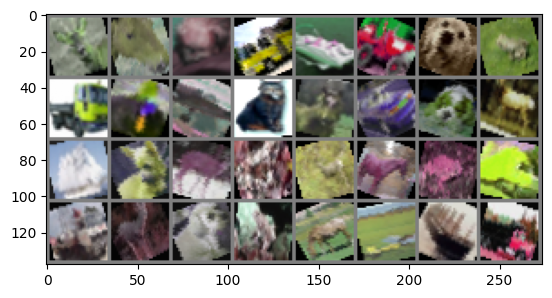

In [21]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torchvision

# Define a set of data augmentation transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Apply the transformations to the CIFAR-10 dataset
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate through the DataLoader and visualize some augmented images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(dataloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [22]:
images.shape

torch.Size([32, 3, 32, 32])

**Custom Data Augmentation**

If you need custom data augmentation beyond the predefined transforms, you can write your own transformation functions. Each custom transformation should implement the __call__ method.
Example: Custom Transformation

Files already downloaded and verified


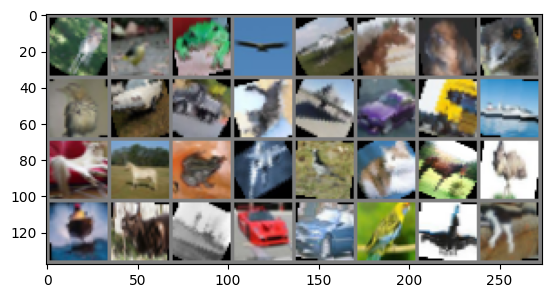

In [26]:
class RandomInvert:
    def __init__(self, p=0.5):
        self.p = p

    def __call__(self, x):
        if torch.rand(1).item() < self.p:
            x = x
        return x

# Applying the custom transformation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0)),
    RandomInvert(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate through the DataLoader and visualize some augmented images
dataiter = iter(dataloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


**Applying Data Augmentation Only to Training Data**

Typically, data augmentation is applied only to the training data and not to the validation or test data. Here’s an example of how to apply different transformations to training and validation datasets:

Files already downloaded and verified
Files already downloaded and verified


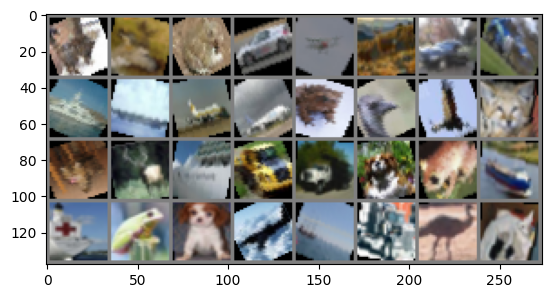

In [27]:
# Define transformations for training and validation sets
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Apply the transformations
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Iterate through the DataLoader and visualize some training and validation images
train_iter = iter(train_loader)
train_images, train_labels = next(train_iter)
imshow(torchvision.utils.make_grid(train_images))



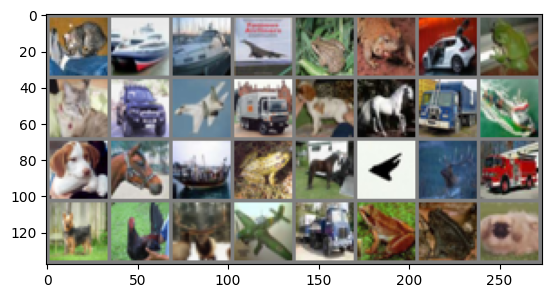

In [28]:
val_iter = iter(val_loader)
val_images, val_labels = next(val_iter)
imshow(torchvision.utils.make_grid(val_images))